## Main goal: speed up search of finding srvs. Two ways of trying to improve it:

### Technical improvement (identify time-consuming functions and try to improve them with another package/implementation)

### Model parameter improvement (run experiments to find the optimal model parameters (num_repeats, cost_function, initial_guess))

### Further: research how synergistic information is related to portfolio performance.0) Consider X1 and X2 independent stocks which can go up (+1) or down (-1).  1) 

In [138]:
import os
import random
import time
import glob
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## load data

## load best runs for number of states

In [139]:
#Adjust path to results
import os
path = os.getcwd()
print(path)
folder = 'preliminaries'
os.chdir('../results/'+folder)
path = os.getcwd()
path

C:\Users\enrik\Desktop\Mabomba\Studie\MasterCS\Thesis\results\preliminaries


FileNotFoundError: [WinError 3] Het systeem kan het opgegeven pad niet vinden: '../results/preliminaries'

In [141]:
# get files
cur = glob.glob("*.pkl")
cur

['states2time20220126-214452.pkl']

In [147]:
df = pd.read_pickle(cur[0])
df = df.replace(np.nan, 0)
df['I(Xi;S)'] = df['I(Xi;S)'].replace(np.nan, 0)
df

systemID exp_sort                                              parXY  \
0         0  python2  [0.694775129800687, 0.42214995142596357, 0.321...   
1         1  python2  [0.215933509121208, 0.40150041776851836, 0.542...   
2         2  python2  [0.4326780449773862, 0.8105737888501576, 0.272...   
3         3  python2  [0.5082415613891024, 0.6551426494198788, 0.666...   
4         4  python2  [0.4185667969594737, 0.847914307316051, 0.8345...   
0         0  syndisc  [0.694775129800687, 0.42214995142596357, 0.321...   
1         1  syndisc  [0.215933509121208, 0.40150041776851836, 0.542...   
2         2  syndisc  [0.4326780449773862, 0.8105737888501576, 0.272...   
3         3  syndisc  [0.5082415613891024, 0.6551426494198788, 0.666...   
4         4  syndisc  [0.4185667969594737, 0.847914307316051, 0.8345...   

       H(S)  syn_upper  runID  syn_info  tot_runtime  lenS  \
0  0.927545   0.880968      0  0.004106     1.717000   1.0   
1  1.749396   0.742950      0  0.000000     5.586000   0.0   
2  1.910705   0.769491      0  0.007281     9.220000   2.0   
3  0.000000   0.923800      0  0.000000     3.609000   0.0   
4  0.000000   0.633776      0  0.008450     3.221000   2.0   
0  0.905913   0.880968      1  0.004614     0.046864   0.0   
1  0.971822   0.742950      1  0.030732     0.017950   0.0   
2  0.700270   0.769491      1  0.003511     0.016957   0.0   
3  0.999172   0.923800      1  0.020222     0.017951   0.0   
4  0.969872   0.633776      1  0.003057     0.020946   0.0   

                                          I(Xi;S)  ...  dist_type states  \
0   [0.0006517218762003285, 0.017918587328512814]  ...  dirichlet      2   
1     [0.006896287502105025, 0.01992913063398838]  ...  dirichlet      2   
2     [0.004692132116145942, 0.12832176689656327]  ...  dirichlet      2   
3                                               0  ...  dirichlet      2   
4                                               0  ...  dirichlet      2   
0                    [0.0, 2.220446049250313e-16]  ...  dirichlet      2   
1                    [0.0, 4.440892098500626e-16]  ...  dirichlet      2   
2  [2.220446049250313e-16, 2.220446049250313e-16]  ...  dirichlet      2   
3                                      [0.0, 0.0]  ...  dirichlet      2   
4  [4.440892098500626e-16, 2.220446049250313e-16]  ...  dirichlet      2   

   num_srvs  summed_modulo  systems   tol   rowfolder lenY  lenX  \
0         1          False        5  0.05  /row_data/    1     2   
1         1          False        5  0.05  /row_data/    1     2   
2         1          False        5  0.05  /row_data/    1     2   
3         1          False        5  0.05  /row_data/    1     2   
4         1          False        5  0.05  /row_data/    1     2   
0         1          False        5  0.05  /row_data/    1     2   
1         1          False        5  0.05  /row_data/    1     2   
2         1          False        5  0.05  /row_data/    1     2   
3         1          False        5  0.05  /row_data/    1     2   
4         1          False        5  0.05  /row_data/    1     2   

                      folder  
0  ../results/preliminaries/  
1  ../results/preliminaries/  
2  ../results/preliminaries/  
3  ../results/preliminaries/  
4  ../results/preliminaries/  
0  ../results/preliminaries/  
1  ../results/preliminaries/  
2  ../results/preliminaries/  
3  ../results/preliminaries/  
4  ../results/preliminaries/  

[10 rows x 27 columns]

In [145]:
print(d.keys())
df = df.replace(np.nan, 0)

Index(['systemID', 'exp_sort', 'parXY', 'H(S)', 'syn_upper', 'runID',
       'syn_info', 'tot_runtime', 'lenS', 'I(Xi;S)', 'I(Y;S)', 'pXS', 'save',
       'tot_repeats', 'prev', 'exp', 'mm', 'dist_type', 'states', 'num_srvs',
       'summed_modulo', 'systems', 'tol', 'rowfolder', 'lenY', 'lenX',
       'folder'],
      dtype='object')


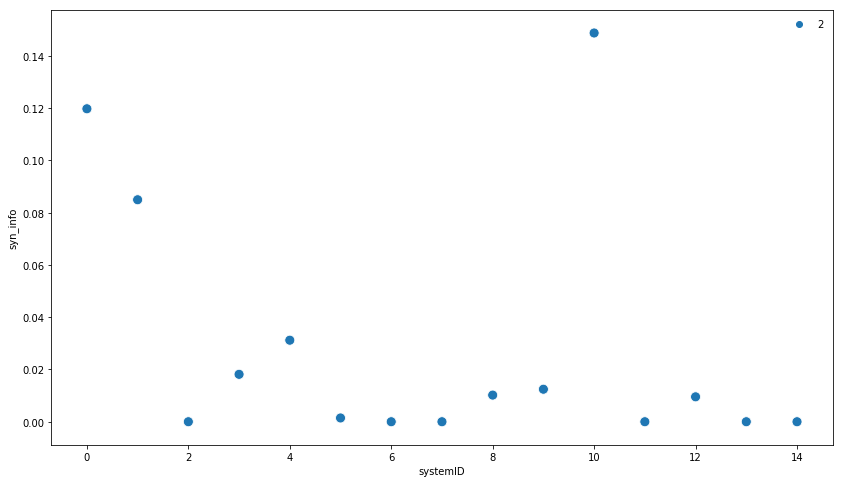

In [39]:
dfbest = getbest(d[d['tot_repeats']==repeats[-1]])
fig, ax = plt.subplots(figsize=(14,8))
sns.scatterplot(data=dfbest, x='systemID', y='syn_info', hue='states',palette='tab10',s=100,ax=ax)
ax.legend(frameon=False)

### Plot JS divergence to summed modulo SRV for best final params

In [40]:
import sys  
sys.path.insert(0, '../python3/')

from JointProbabilityMatrix import JointProbabilityMatrix
from ConditionalProbabilityMatrix import ConditionalProbabilityMatrix

from params_matrix import params2matrix_incremental, matrix2params_incremental
from measures import synergistic_information,append_variables_using_state_transitions_table
import dit
from dit import Distribution
from dit.divergences import kullback_leibler_divergence
from dit.divergences import jensen_shannon_divergence

In [41]:
def params_to_conds(pXS,params_before,s_params,subjects):
    params2matrix_incremental(pXS,params_before+s_params)
    pdf = pXS.joint_probabilities.joint_probabilities
    conds = pXS.conditional_probability_distributions(subjects)
    condslist = list(conds.cond_pdf.values())
    conds = []
    for c in condslist:
        conds = conds + list(c.joint_probabilities.joint_probabilities)
    return conds,pdf
    
def getcondS(row,pdummy,modulo_params):
    len_parX = int((row['states']**row['lenX'])-1)
    parX = row['parXY'][:len_parX]
    subjects = range(int(row['lenX']))

    curcond, curpdf = params_to_conds(pdummy,parX,row['final_params'],subjects) 
    row['pSi_X'] = curcond
    row['pXSi'] = curpdf
    params2matrix_incremental(pdummy,parX+modulo_params)
    modulopdf = pdummy.joint_probabilities.joint_probabilities
    curdit = Distribution.from_ndarray(curpdf)
    modulodit = Distribution.from_ndarray(modulopdf)
    row['JS'] = jensen_shannon_divergence([curdit,modulodit])
    return row

In [42]:
# calculate pSi_X and pXSi for each run
states = dfbest.iloc[0]['states']
lenX = dfbest.iloc[0]['lenX']
pdummy = JointProbabilityMatrix(lenX,states)
append_variables_using_state_transitions_table(pdummy,
        state_transitions=lambda vals, mv: [int(np.mod(np.sum(vals), mv))]*1) 
free_params = (states**(lenX+1))-(states**lenX)
modulo_params = matrix2params_incremental(pdummy)[-free_params:]

dfbest.explode('final_params').apply(getcondS,args=(pdummy,modulo_params,),axis=1)


TypeError: can only concatenate list (not "float") to list

## calculate mi between final params and group srvs

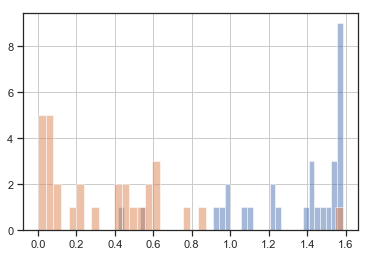

In [280]:
import seaborn
seaborn.set(style='ticks')

def code_to_cond(code, input_states, states):
    cmatrix = ConditionalProbabilityMatrix()
    cond_mat = np.zeros((len(input_states),states))
    for i in range(len(code)):        
        cond_mat[i,code[i]] += 1
        pdummy = JointProbabilityMatrix(1, states)
        pdummy.joint_probabilities.joint_probabilities = cond_mat[i]
        cmatrix.cond_pdf[input_states[i]] = pdummy
    return cmatrix

def srv_pars(states, generators, lenX=2):
    """
    calculate ConditionalProbabilityMatrix for each SRV
    """
    
    # get modulo rows
    rows = [np.arange(states)]
    step = 1

    srvs = []
    for k in generators[states]:
        first = np.arange(states)
        rows = [(first+k[1]) % states]
        for i in range(states-1):
            b = (k[0] + rows[-1]) % states
            rows.append(b)
        srvs.append(np.array(rows))
    
    # get params per rows permutation
    codes = [np.matrix(s).flatten().tolist()[0] for s in srvs]

    # get conditional distribution p(Si|X)
    input_states = states**lenX
    input_values = list(itertools.product(*[np.arange(states) for _ in range(lenX)]))
    conds = [code_to_cond(code, input_values, states) for code in codes]
    return conds, codes

def get_mutuals(row,conds,l_conds):
    pdummy = JointProbabilityMatrix(row['lenX']+1, row['states'])
    pdummy.joint_probabilities.joint_probabilities = row['pXSi']
    
    subjects = np.arange(row['lenX'])
    for s in conds:
        pdummy.append_variables_using_conditional_distributions(s,subjects)
    d = Distribution.from_ndarray(pdummy.joint_probabilities.joint_probabilities)
    
    mutuals = np.zeros(l_conds)
    for i in range(len(conds)):
        row['SRV_'+str(i)] = dit.shannon.mutual_information(d, [lenX],[lenX+i])
    return row

generators = {2:[(1,0)],3:[(1,0),(2,0)],4:[(1,0),(2,0)],5:[(1,0),(2,0),(3,0),(4,0)]}
conds, srvs = srv_pars(states,generators,lenX)
df = finals[['pXSi','states','lenX']].apply(get_mutuals,args=(conds,len(conds)),axis=1)
# finals = dfbest.explode('final_params').apply(getcondS,args=(pdummy,modulo_params,),axis=1)

import matplotlib.pyplot as plt
fig = plt.figure()
ax1 = fig.add_subplot(111)
for i in range(len(conds)):
    df['SRV_'+str(i)].hist(bins = 40,alpha = 0.5)
plt.show()